In [58]:
%matplotlib inline

In [59]:
import os
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pydicom
from PIL import Image
import scipy.ndimage

In [63]:
def draw_box(
    image,
    x,
    y,
    width,
    height,
    color = None,
    lw=4,
):
    
    """Draw bounding box on an image

    Arguments:
        image {np.ndarray}: Numpy array of the image
        x {int}: X coordinate of the bounding-box (from csv)
        y {int}: Y coordinate of the bounding-box (from csv)
        width {int}: Width of the bounding-box (from csv)
        hight {int}: Hight of the bounding-box (from csv)
        color {}: Color of the bounding-box (default: {None})
        lw {int}: Line width (default: {4})

    Returns:
        image {np.ndarray}: Numpy array of the image with the bounding-box
    """

    x = min(max(x, 0), image.shape[1] - 1)
    y = min(max(y, 0), image.shape[0] - 1)
    if color is None:
        color = np.max(image)
    if len(image.shape) > 2 and not hasattr(color, "__len__"):
        color = (color,) + (0,) * (image.shape[-1] - 1)
    image[y : y + lw, x : x + width] = color
    image[y + height - lw : y + height, x : x + width] = color
    image[y : y + height, x : x + lw] = color
    image[y : y + height, x + width - lw : x + width] = color
    return image

In [68]:
def _get_image_laterality(pixel_array: np.ndarray) -> str:
    left_edge = np.sum(pixel_array[:, 0])  # sum of left edge pixels
    right_edge = np.sum(pixel_array[:, -1])  # sum of right edge pixels
    return "R" if left_edge < right_edge else "L"

## Test on DBT-P00024_DBT-S03255_lcc image

In [60]:
img_path = '/Users/andreaberti/Documents/work/DBT/DBT_TCIA/dcm_images/benign/DBT-P00024_DBT-S03255_lcc.dcm'
csv_path = '/Users/andreaberti/Documents/work/DBT/DBT_TCIA/BCS-DBT_boxes-train-v2.csv'

Open the csv with pandas

In [61]:
dcm_img = pydicom.dcmread(img_path)
# dcm_img.decompress(handler_name='pylibjpeg')

In [53]:
npy_img = dcm_img.pixel_array

In [54]:
npy_img = np.flip(npy_img, (1, 2))
npy_img = ((npy_img - np.amin(npy_img))/(np.amax(npy_img) - np.amin(npy_img)))*255

In [55]:
npy_img =npy_img.astype(np.uint8)

In [56]:
npy_img.shape

(73, 2457, 1996)

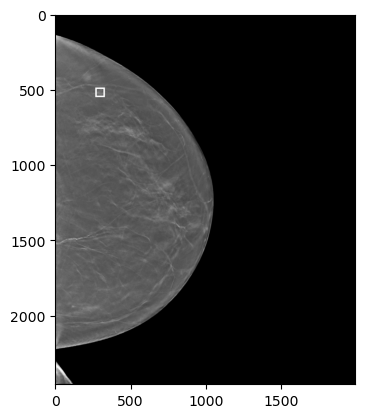

In [57]:
img_bbox = draw_box(image=npy_img[19, :, :], x=267, y=488, width=64, height=64, lw=10)
plt.imshow(img_bbox, cmap='gray')

In [54]:
view = 'lcc'
view_laterality = view[0].upper()

In [55]:
view_laterality

'L'

## Test on DBT-P00013_DBT-S00163_rmlo image

In [66]:
img_path = '/Users/andreaberti/Documents/work/DBT/DBT_TCIA/dcm_images/benign/DBT-P00013_DBT-S00163_rmlo.dcm'
dcm_img = pydicom.dcmread(img_path)
npy_img = dcm_img.pixel_array
# npy_img = np.flip(npy_img, (1, 2))
npy_img = ((npy_img - np.amin(npy_img))/(np.amax(npy_img) - np.amin(npy_img)))*255
npy_img =npy_img.astype(np.uint8)

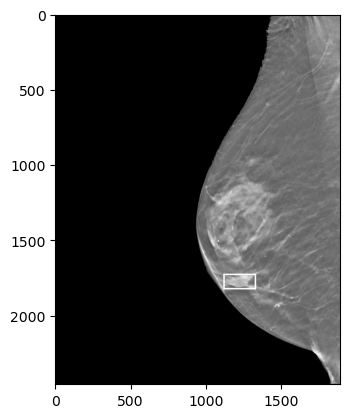

In [67]:
img_bbox = draw_box(image=npy_img[16, :, :], x=1116, y=1724, width=218, height=105, lw=10)
plt.imshow(img_bbox, cmap='gray')

## Test on DBT-P00024_DBT-S03255_lmlo image

In [70]:
img_path = '/Users/andreaberti/Documents/work/DBT/DBT_TCIA/dcm_images/benign/DBT-P00024_DBT-S03255_lmlo.dcm'
dcm_img = pydicom.dcmread(img_path)
npy_img = dcm_img.pixel_array
view = 'lmlo'
view_laterality = view[0].upper()
image_laterality = _get_image_laterality(npy_img)
if not image_laterality == view_laterality:
        npy_img = np.flip(npy_img, axis=(-1, -2))
# npy_img = np.flip(npy_img, (1, 2))
npy_img = ((npy_img - np.amin(npy_img))/(np.amax(npy_img) - np.amin(npy_img)))*255
npy_img =npy_img.astype(np.uint8)

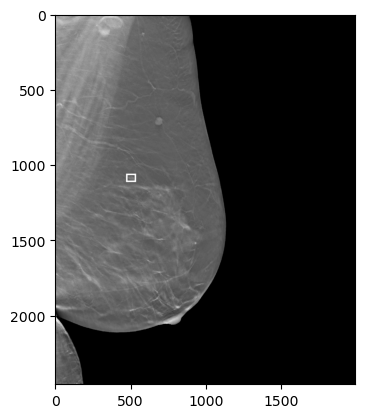

In [72]:
img_bbox = draw_box(image=npy_img[11, :, :], x=471, y=1060, width=67, height=56, lw=10)
plt.imshow(img_bbox, cmap='gray')